In [162]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


**Sigmoid function** 
- g(z) = 1 / (1+e^-z)
- maps all inputs to values between 0 and 1


In [163]:
# compute the sigmoid of z
def sigmoid(z):

    g = 1 / (1+np.exp(-z))

    return g


Text(0.5, 0, 'Input')

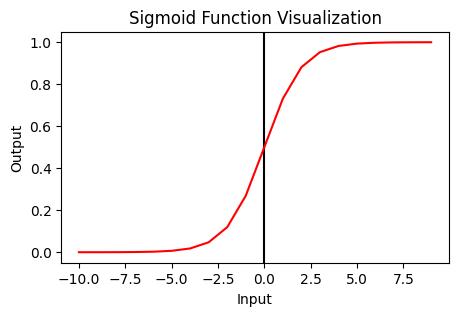

In [164]:
sample_inputs = np.arange(-10,10)
sample_outputs = sigmoid(sample_inputs)

fig, ax = plt.subplots(1, 1, figsize=(5,3))
plt.axvline(x=0, color='0', linestyle='-')
ax.plot(sample_inputs, sample_outputs, color='r')
ax.set_title("Sigmoid Function Visualization")
ax.set_ylabel("Output")
ax.set_xlabel("Input")



**Logistic Regression**
- for logistic regression, the sigmoid function is used where z is the output of a linear regression model (w⋅x + b)
g(w⋅x + b) = 1 / (1 + e^-[w⋅x + b])
- decision boundary lies at z = 0
- g can also be nonlienar for a nonlienar boundary (i.e g(w1x1^2 + w2x2^2 + b))


**Cost Function**
- if we tried to use MSE as the cost function, it would be very non-convex, with lots of local minima to get stuck in -> therefore not a good choice
- we should use: Loss = {
                            -log(f(xi)),     if yi = 1
                            -log(1 - f(xi)), if yi = 0
                        }
- full loss function = -yi*log(f(xi)) - (1 - yi)*log(1 - f(xi))

C:\Users\tjawo\AppData\Local\Temp\ipykernel_4596\2813160540.py:13: RuntimeWarning: divide by zero encountered in log
  positive_losses = -np.log(predicted)


Text(0, 0.5, 'Loss')

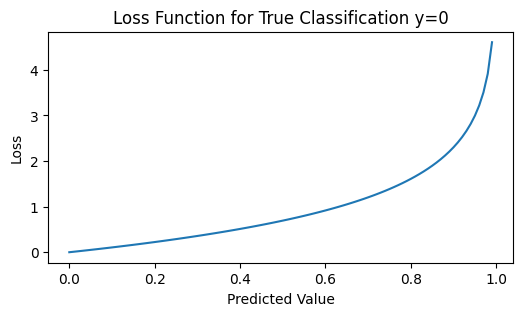

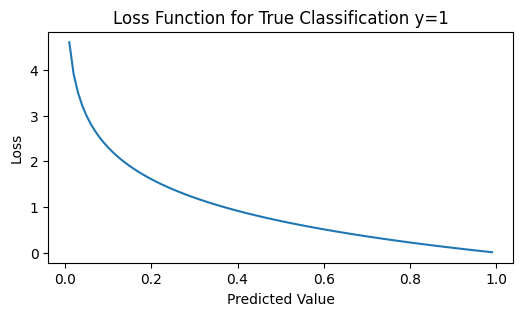

In [165]:
predicted = np.arange(0, 1, 0.01)

# Loss for y=0 (negative classification)
negative_losses = -np.log(1 - predicted)

fig, ax = plt.subplots(1, 1, figsize = (6,3))
ax.plot(predicted, negative_losses)
ax.set_title("Loss Function for True Classification y=0")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Loss")

# Loss for y=1 (positive classification)
positive_losses = -np.log(predicted)

fig, ax = plt.subplots(1, 1, figsize = (6,3))
ax.plot(predicted, positive_losses)
ax.set_title("Loss Function for True Classification y=1")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Loss")

**Cost Function** <br>
J(w, b) = 1/m ∑(Loss Function)

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]


Text(0, 0.5, 'x1')

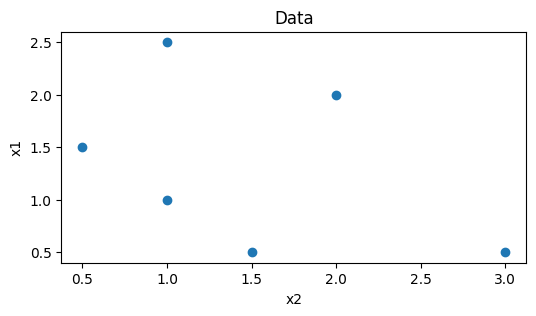

In [166]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) # dimension (m,n)
Y_train = np.array([0, 0, 0, 1, 1, 1]) # dimention (m, )

print(X_train)
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.scatter(X_train[:,0], X_train[:,1])
ax.set_title("Data")
ax.set_xlabel('x2')
ax.set_ylabel("x1")


In [167]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0

    for i in range(m):

        z_i = np.dot(X[i], w) + b
        y_pred = sigmoid(z_i)
        loss = -y[i]*np.log(y_pred) - (1-y[i])*np.log(1-y_pred)
        cost += loss
    
    cost /= m
    return cost

In [168]:
w_temp = np.array([1,1])
b_temp = -3

cost = compute_cost_logistic(X_train, Y_train, w_temp, b_temp)
print(f'Cost: {cost}')

Cost: 0.36686678640551745


**Gradient Descent for Logistic Regression**

To help with convergence:
- monitor gradient descent (learning)
- vectorized implementation
- feature scaling

In [169]:
def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        y_pred = sigmoid(np.dot(X[i], w) + b)
        error_i = y_pred - y[i]

        for j in range(n):
            dj_dw[j] = dj_dw[j] + error_i * X[i,j]
        
        dj_db = dj_db + error_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [170]:
def gradient_descent(X, y, w_initial, b_initial, alpha, num_iters):
    loss_history = []
    w = copy.deepcopy(w_initial) # avoid modifying global weight within function
    b = b_initial

    for i in range(num_iters):

        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Parameter updates
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            loss_history.append(compute_cost_logistic(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration: {i:4d}, Cost: {loss_history[-1]}")

    return w, b, loss_history
        


Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   


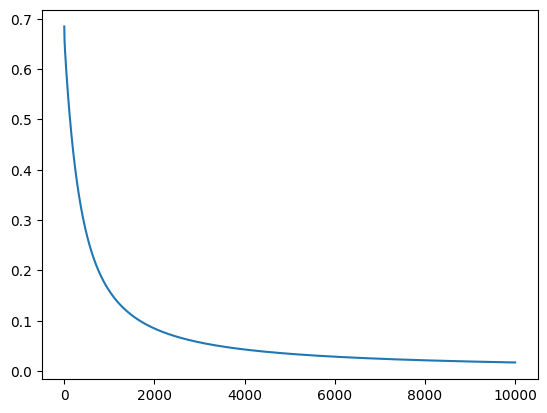

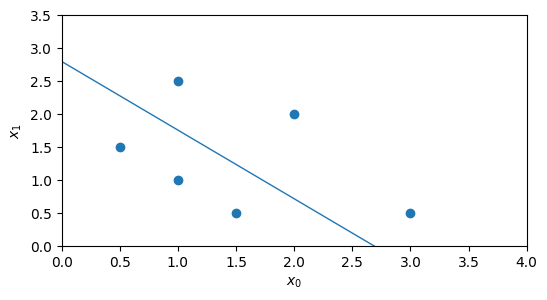

In [174]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000
 
w_out, b_out, training_history = gradient_descent(X_train, Y_train, w_tmp, b_tmp, alpha, iters)

# plot training history
x_hist = np.arange(0, iters)
plt.plot(x_hist, training_history)

# plot results
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.axis([0, 4, 0, 3.5])
ax.scatter(X_train[:,0], X_train[:,1])

# plot decisioj boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0, x0], [x1, 0], lw = 1)
plt.show()
